In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
pd.set_option('display.max_columns',None)
plt.style.use('ggplot')

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Corelia\Task 7 - Supply Chain

07/16/2023  04:27 PM    <DIR>          .
07/16/2023  04:27 PM    <DIR>          ..
07/11/2023  01:54 PM    <DIR>          .ipynb_checkpoints
07/11/2023  09:23 PM         3,119,824 1- EDA.ipynb
07/16/2023  04:27 PM           920,374 2- Anomaly Detection.ipynb
07/11/2023  03:47 PM    <DIR>          Data
               2 File(s)      4,040,198 bytes
               4 Dir(s)  11,420,135,424 bytes free


## Display and get insights about the data

In [4]:
data = pd.read_csv('Data/DataCoSupplyChainDataset.csv',encoding='unicode_escape')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [6]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in our Data")

There are 180519 Rows and 53 Columns in our Data


In [7]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


benefit per order , order item profit ratio , Order Profit Per Order  has negative values ?

In [8]:
count_null = data.isnull().sum()
print("Columns that have null values : \n")
for col in count_null.index:
    if count_null[col] > 0:
        print(col,"The number of Nulls :- " , count_null[col])

Columns that have null values : 

Customer Lname The number of Nulls :-  8
Customer Zipcode The number of Nulls :-  3
Order Zipcode The number of Nulls :-  155679
Product Description The number of Nulls :-  180519


## Feature Engineering

In [9]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['OrderYear'] = data['order date (DateOrders)'].dt.year
data['OrderMonth'] = data['order date (DateOrders)'].dt.month

data['isLate'] = data['Days for shipping (real)'] > data['Days for shipment (scheduled)']

data['CustomerName'] = data['Customer Fname'] + " " + data['Customer Lname']

data['FraudOrder'] = data['Order Status'].apply(lambda x: True if x == "SUSPECTED_FRAUD" else False)

In [10]:
data = data.drop(['Product Description','Product Image',"Customer Lname",
                  'Customer Password','Customer Email','Customer Fname',
                 'Product Image','Product Description','Order Zipcode','Product Status'],axis=1)

In [11]:
categorical_columns = [col for col in data.columns if data[col].dtype == "O"]
print(f"Number of Categorical columns is {len(categorical_columns)}")
numerical_columns = [col for col in data.columns if data[col].dtype != "O"]
print(f"Number of Numerical columns is {len(numerical_columns)}")

Number of Categorical columns is 19
Number of Numerical columns is 31


In [12]:
numerical_columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Latitude',
 'Longitude',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price',
 'OrderYear',
 'OrderMonth',
 'isLate',
 'FraudOrder']

In [13]:
print(f"Number of Duplicates is {sum(data.duplicated())}")

Number of Duplicates is 0


In [14]:
def get_insights(col):
    print(f"Some Insights about the # {col} # Column \n")
    print(f"Number of Unique Values is {data[col].nunique()}")
    print("Some Random Values",data[col].sample(5).values,"\n")
    print("top 10 values counts\n",data[col].value_counts()[:10])

In [15]:
def count_plot(col):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data,x=col)
    plt.xticks(rotation=70)
    plt.show()
def pie_plot(col,limit=10,title=''):
    plt.figure(figsize=(10,6))
    plt.pie(x=data[col].value_counts()[:limit],labels=data[col].value_counts()[:limit].index,
           autopct='%1.1f%%')
    plt.title(title)
    plt.show()
def multi_count_plot(col1,col2):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data,x=col1,hue=col2)
    plt.show()
def pie_plot_count(col,title):
    fig,ax = plt.subplots(1,2,figsize=(14,6))
    plt.subplot(1,2,1)
    plt.pie(x=data[col].value_counts(),labels=data[col].value_counts().index,
           autopct='%1.1f%%',labeldistance=0.7,explode=[0.05] * len(data[col].value_counts().values))
    plt.title(title)
    plt.subplot(1,2,2)
    sns.countplot(data=data,x=col)
    plt.show() 
def bar_plot_limited(mini_data,col,limit):
    top_jobs = mini_data[col].value_counts().nlargest(limit)
    sns.barplot(x=top_jobs.index, y=top_jobs.values)
    plt.title(f'Top {limit} {col}')
    plt.xlabel(col)
    plt.xticks(rotation=80)
    plt.ylabel('Frequency')
    plt.show()

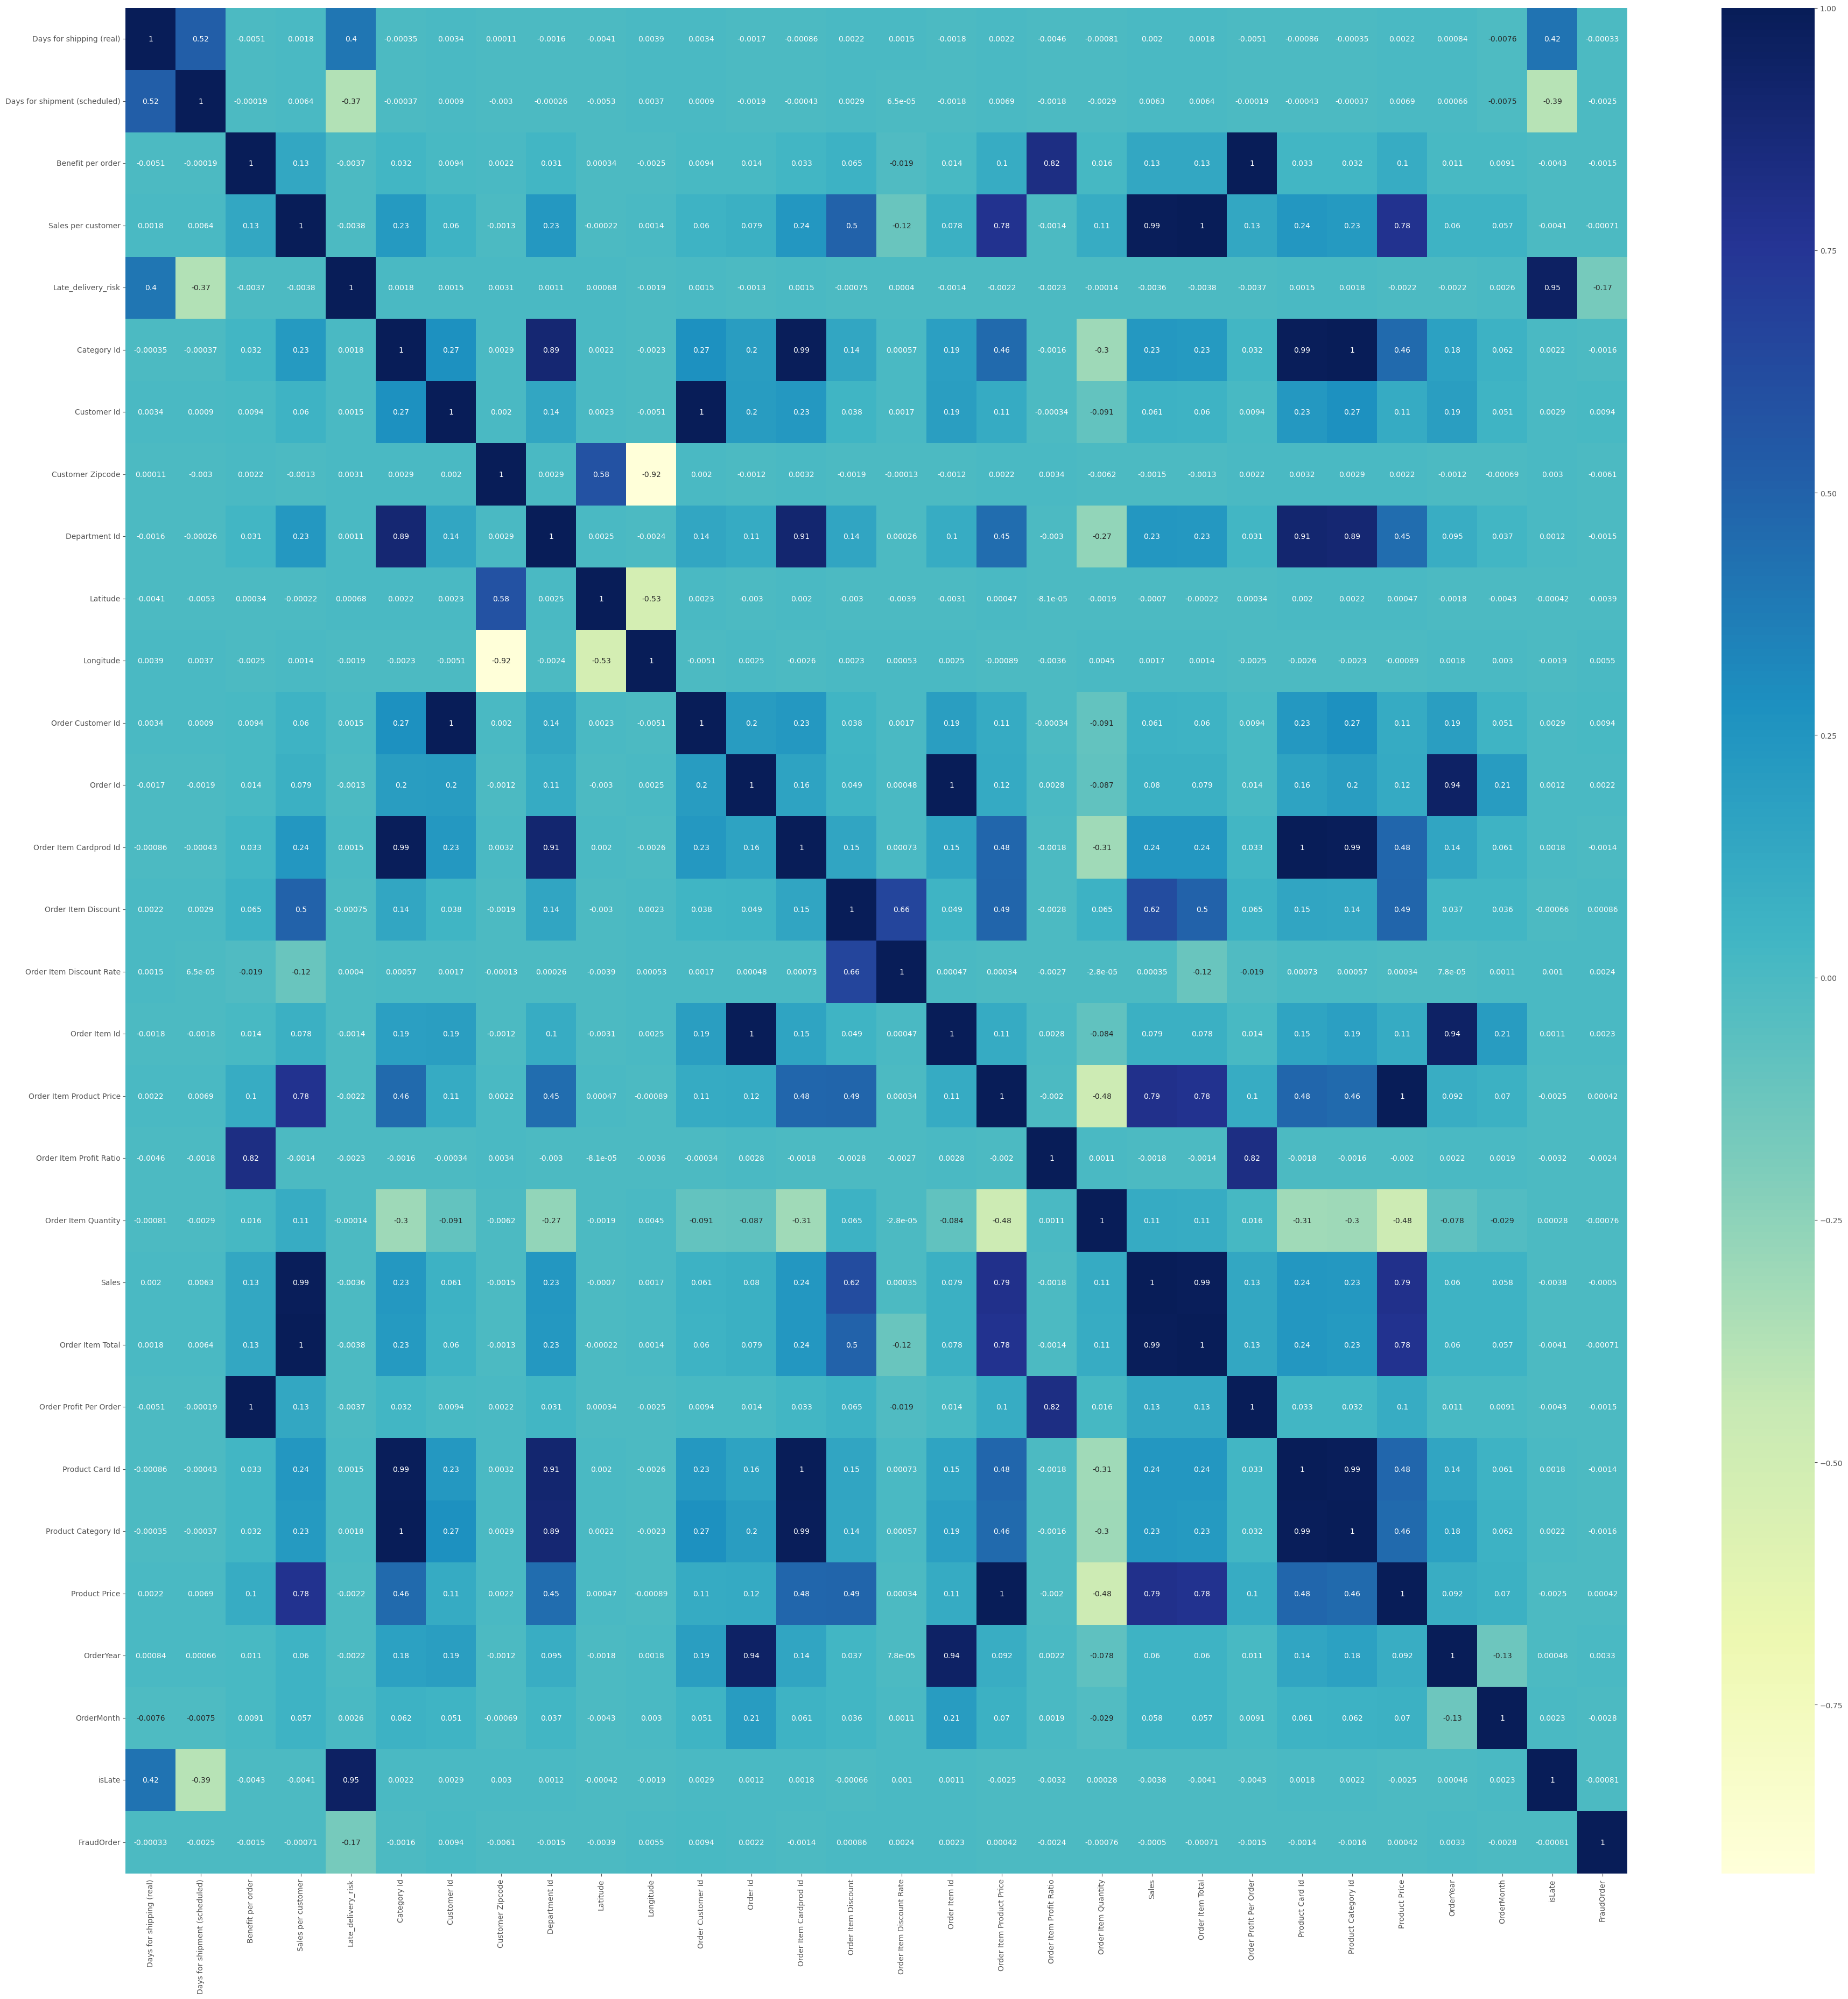

In [16]:
plt.figure(figsize=(45,45))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [17]:
data.corr()['Days for shipping (real)']['Days for shipment (scheduled)']

0.5158800202898479

In [18]:
for col1 in numerical_columns:
    try:
        data_corr = data.corr()[col1]
    except:
        continue
    for col2 in data_corr.index:
        if data_corr[col2] == 1:
            if col1 != col2 :
                print(col1 , ":" , col2)

Benefit per order : Order Profit Per Order
Sales per customer : Order Item Total
Category Id : Product Category Id
Customer Id : Order Customer Id
Order Customer Id : Customer Id
Order Item Cardprod Id : Product Card Id
Order Item Product Price : Product Price
Order Item Total : Sales per customer
Order Profit Per Order : Benefit per order
Product Card Id : Order Item Cardprod Id
Product Category Id : Category Id
Product Price : Order Item Product Price


In [19]:
data[['Order Item Total','Sales per customer']].head()

,Order Item Total,Sales per customer
0,314.640015,314.640015
1,311.359985,311.359985
2,309.720001,309.720001
3,304.809998,304.809998
4,298.250000,298.250000


In [20]:
data = data.drop(['Order Item Total','Order Profit Per Order','Product Category Id',
                  'Order Customer Id','Order Item Cardprod Id'],axis=1)

In [21]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,OrderYear,OrderMonth,isLate,CustomerName,FraudOrder
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2/3/2018 22:56,Standard Class,2018,1,False,Cally Holloway,False
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,1/18/2018 12:27,Standard Class,2018,1,True,Irene Luna,False
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,South Asia,Rajastán,CLOSED,1360,Smart watch,327.75,1/17/2018 12:06,Standard Class,2018,1,False,Gillian Maldonado,False
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,Oceania,Queensland,COMPLETE,1360,Smart watch,327.75,1/16/2018 11:45,Standard Class,2018,1,False,Tana Tate,False
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.75,1/15/2018 11:24,Standard Class,2018,1,False,Orli Hendricks,False


### Important Metrics

In [62]:
print(f"Total Sales is {round(data['Sales'].sum() / 1000000,2)} M \n")
print(f"The number of Categories is {data['Category Id'].nunique()} Category \n ")
print(f"the number of customers is {data['Customer Id'].nunique()} \n")
print(f"the number of Orders is {data['Order Id'].nunique()} Order\n")

Total Sales is 36.78 M 

The number of Categories is 51 Category 
 
the number of customers is 20652 

the number of Orders is 65752 Order



In [61]:
data[data['Order Id'] == 48880]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,OrderYear,OrderMonth,isLate,CustomerName,FraudOrder,Order Year_month
118698,TRANSFER,6,2,34.119999,97.489998,Late delivery,1,18,Men's Footwear,Los Angeles,EE. UU.,3714,Consumer,CA,1905 Merry Cloud Plaza,90066.0,4,Apparel,34.001583,-118.432152,Pacific Asia,Al Mubarraz,Arabia Saudí,2016-12-14 12:29:00,48880,32.5,0.25,122220,129.990005,0.35,1,129.990005,West Asia,Ash Sharqiyah,PROCESSING,403,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,12/20/2016 12:29,Second Class,2016,12,True,Kimberly Williams,False,2016-12
119105,TRANSFER,6,2,44.619999,193.979996,Late delivery,1,9,Cardio Equipment,Los Angeles,EE. UU.,3714,Consumer,CA,1905 Merry Cloud Plaza,90066.0,3,Footwear,34.001583,-118.432152,Pacific Asia,Al Mubarraz,Arabia Saudí,2016-12-14 12:29:00,48880,6.0,0.03,122221,99.989998,0.23,2,199.979996,West Asia,Ash Sharqiyah,PROCESSING,191,Nike Men's Free 5.0+ Running Shoe,99.989998,12/20/2016 12:29,Second Class,2016,12,True,Kimberly Williams,False,2016-12
119676,TRANSFER,6,2,60.779999,159.960007,Late delivery,1,29,Shop By Sport,Los Angeles,EE. UU.,3714,Consumer,CA,1905 Merry Cloud Plaza,90066.0,5,Golf,34.001583,-118.432152,Pacific Asia,Al Mubarraz,Arabia Saudí,2016-12-14 12:29:00,48880,0.0,0.00,122222,39.990002,0.38,4,159.960007,West Asia,Ash Sharqiyah,PROCESSING,627,Under Armour Girls' Toddler Spine Surge Runni,39.990002,12/20/2016 12:29,Second Class,2016,12,True,Kimberly Williams,False,2016-12
119677,TRANSFER,6,2,76.010002,158.360001,Late delivery,1,29,Shop By Sport,Los Angeles,EE. UU.,3714,Consumer,CA,1905 Merry Cloud Plaza,90066.0,5,Golf,34.001583,-118.432152,Pacific Asia,Al Mubarraz,Arabia Saudí,2016-12-14 12:29:00,48880,1.6,0.01,122218,39.990002,0.48,4,159.960007,West Asia,Ash Sharqiyah,PROCESSING,627,Under Armour Girls' Toddler Spine Surge Runni,39.990002,12/20/2016 12:29,Second Class,2016,12,True,Kimberly Williams,False,2016-12
119995,TRANSFER,6,2,60.000000,200.000000,Late delivery,1,24,Women's Apparel,Los Angeles,EE. UU.,3714,Consumer,CA,1905 Merry Cloud Plaza,90066.0,5,Golf,34.001583,-118.432152,Pacific Asia,Al Mubarraz,Arabia Saudí,2016-12-14 12:29:00,48880,50.0,0.20,122219,50.000000,0.30,5,250.000000,West Asia,Ash Sharqiyah,PROCESSING,502,Nike Men's Dri-FIT Victory Golf Polo,50.000000,12/20/2016 12:29,Second Class,2016,12,True,Kimberly Williams,False,2016-12


In [22]:
get_insights('Type')

Some Insights about the # Type # Column 

Number of Unique Values is 4
Some Random Values ['DEBIT' 'PAYMENT' 'PAYMENT' 'CASH' 'CASH'] 

top 10 values counts
 DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64


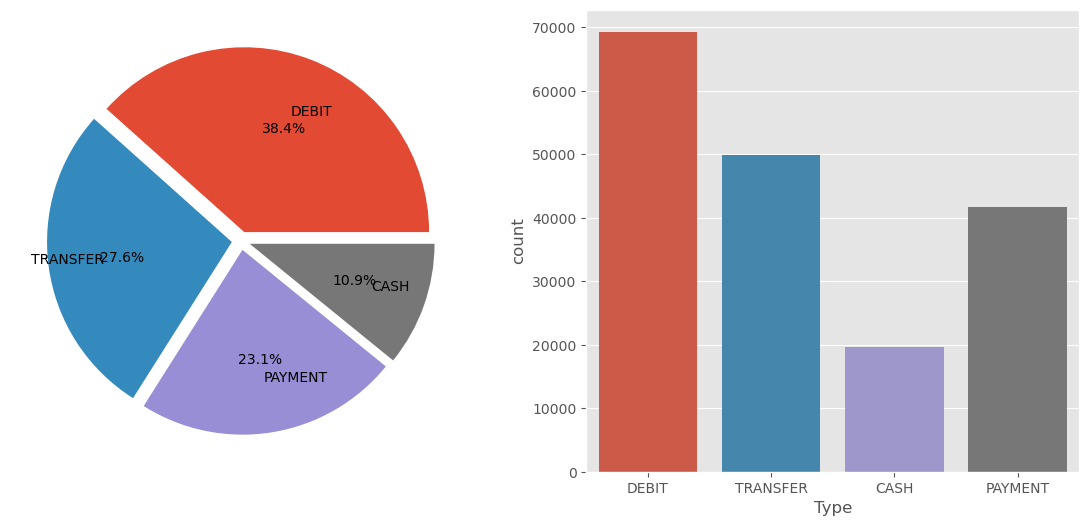

In [23]:
pie_plot_count("Type","")

In [24]:
data[data['FraudOrder'] == True]['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

all fraud orders its type Transfer

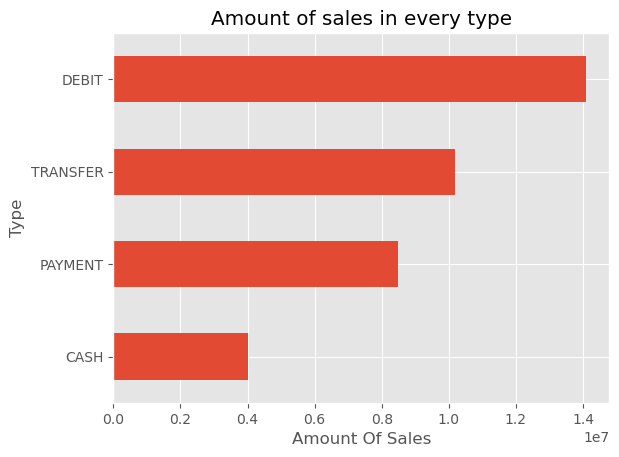

In [64]:
data.groupby('Type').sum()['Sales'].sort_values().plot(kind='barh')
plt.xlabel("Amount Of Sales")
plt.title("Amount of sales in every type")
plt.show()

In [65]:
# for type_cate in data['Type'].unique():
#     mini_data = data[data.Type == type_cate]
#     print("Type is ",type_cate)
#     bar_plot_limited(mini_data,'Order Country',10)

In [27]:
# for type_cate in data['Type'].unique():
#     mini_data = data[data.Type == type_cate]
#     print("Type is ",type_cate)
#     bar_plot_limited(mini_data,'Order Status',10)

### Days for shipping

In [28]:
get_insights('Days for shipping (real)')

Some Insights about the # Days for shipping (real) # Column 

Number of Unique Values is 7
Some Random Values [6 0 4 4 2] 

top 10 values counts
 2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64


In [29]:
get_insights('Days for shipment (scheduled)')

Some Insights about the # Days for shipment (scheduled) # Column 

Number of Unique Values is 4
Some Random Values [4 4 4 0 4] 

top 10 values counts
 4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64


In [30]:
data[['isLate','Days for shipping (real)','Days for shipment (scheduled)']]

,isLate,Days for shipping (real),Days for shipment (scheduled)
0,False,3,4
1,True,5,4
2,False,4,4
3,False,3,4
4,False,2,4
...,...,...,...
180514,False,4,4
180515,True,3,2
180516,True,5,4
180517,False,3,4


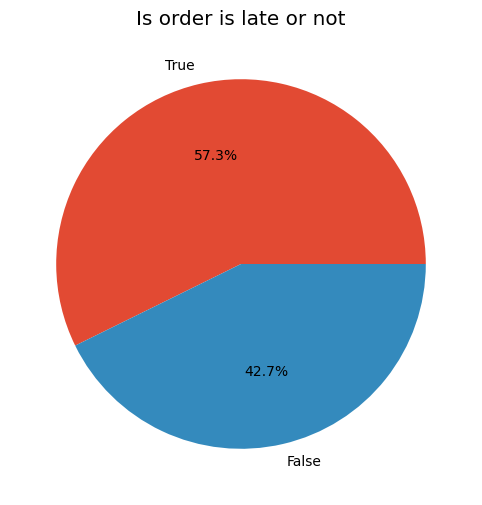

In [31]:
pie_plot('isLate',title="Is order is late or not")

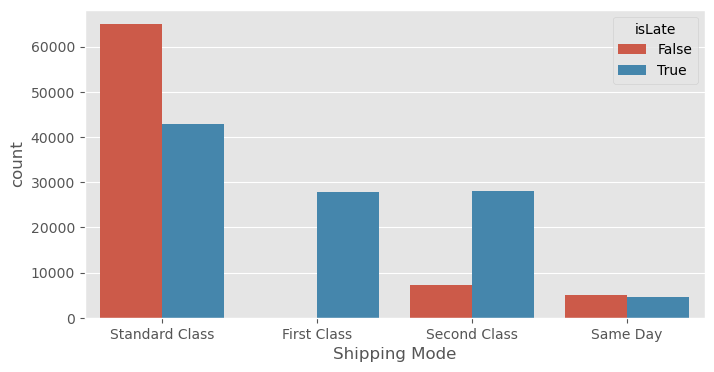

In [32]:
multi_count_plot('Shipping Mode','isLate')

the order is delivered late can be different from class to other

### Delivery Status

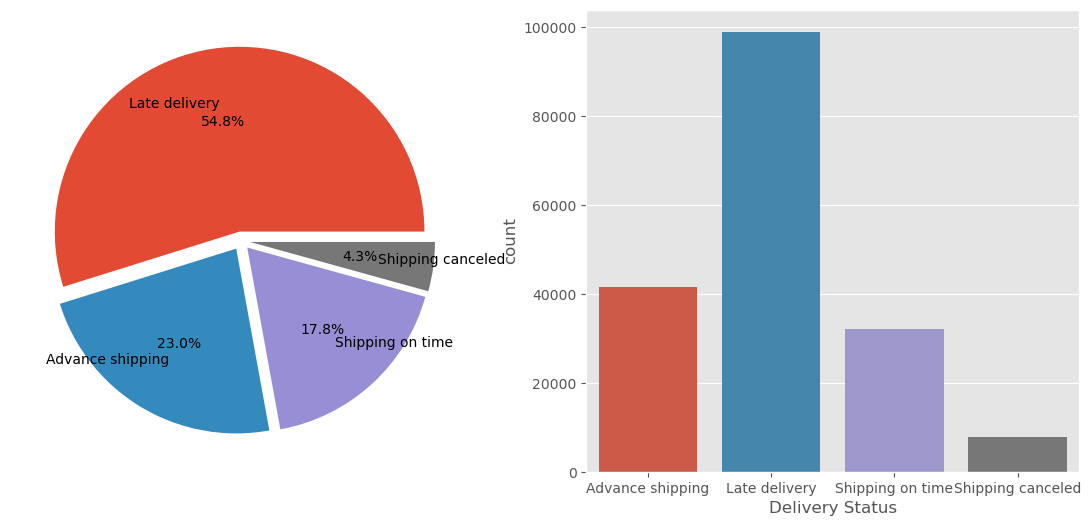

In [33]:
pie_plot_count("Delivery Status","")

In [72]:
mini_data = data[data['Delivery Status'] == "Late delivery"]['Shipping Mode'].value_counts()

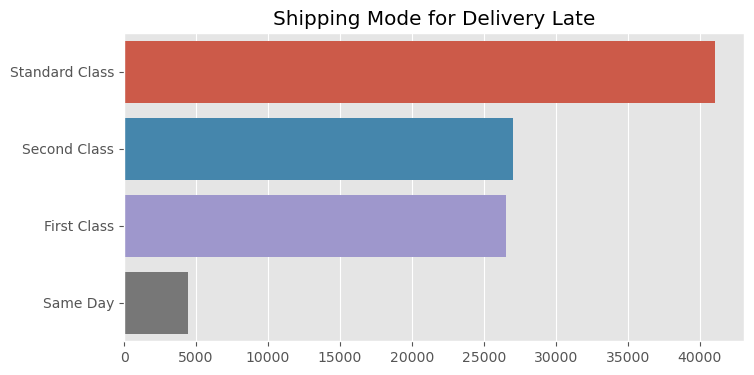

In [75]:
plt.figure(figsize=(8,4))
sns.barplot(y=mini_data.index,x=mini_data.values,orient='h')
plt.title("Shipping Mode for Delivery Late")
plt.show()

### Date

In [34]:
def get_year_month(time):
    time = time.split(" ")[0]
    time = time.split("-")
    return time[0] + "-" + time[1]

In [35]:
data['Order Year_month'] = data['order date (DateOrders)'].astype(str).apply(get_year_month)

In [36]:
mini_date = data.groupby('Order Year_month').sum()['Sales']

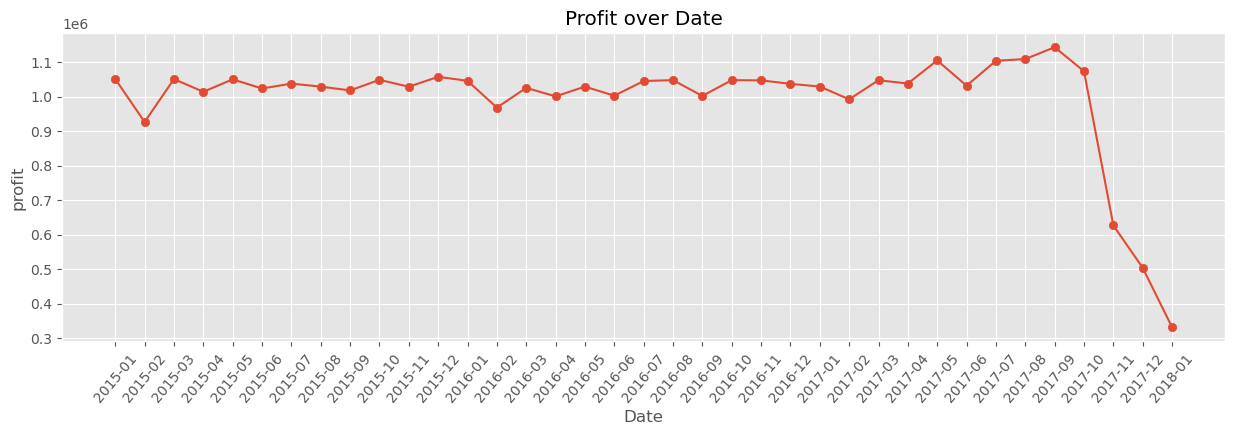

In [37]:
plt.figure(figsize=(15,4))
plt.plot(mini_date.index, mini_date.values)
plt.scatter(x=mini_date.index,y=mini_date.values)
plt.xlabel("Date")
plt.ylabel('profit')
plt.xticks(rotation=50)
plt.title("Profit over Date")
plt.show()

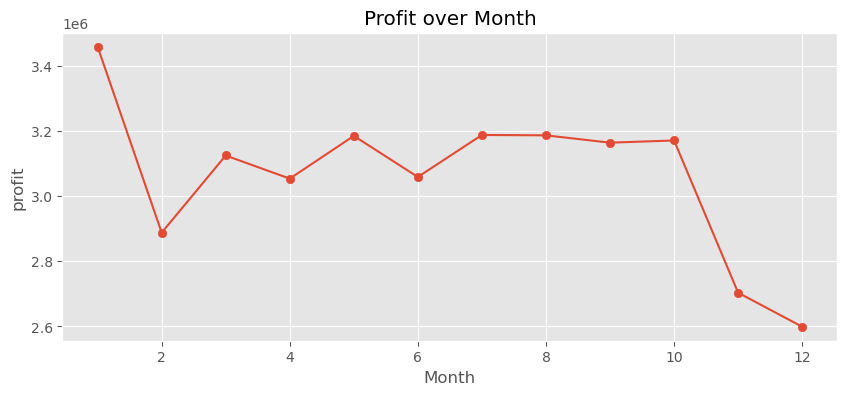

In [38]:
plt.figure(figsize=(10,4))
mini_date = data.groupby('OrderMonth').sum()['Sales']
plt.plot(mini_date.index,mini_date.values)
plt.scatter(x=mini_date.index,y=mini_date.values)
plt.xlabel("Month")
plt.ylabel('profit')
plt.title("Profit over Month")
plt.show()

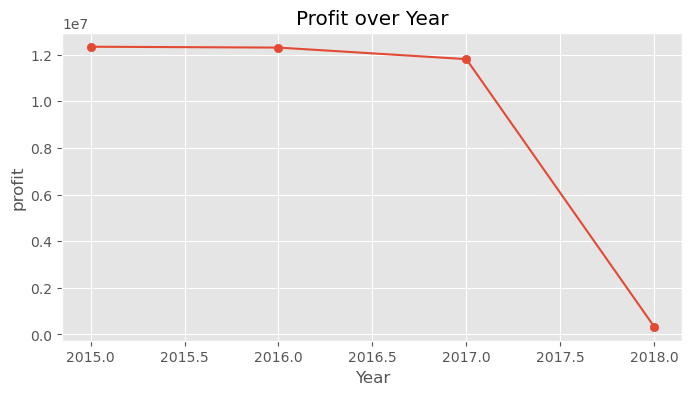

In [39]:
plt.figure(figsize=(8,4))
mini_data = data.groupby('OrderYear').sum()['Sales']
plt.plot(mini_data.index,mini_data.values)
plt.scatter(x=mini_data.index,y=mini_data.values)
plt.xlabel("Year")
plt.ylabel('profit')
plt.title("Profit over Year")
plt.show()

In [40]:
Fraud_over_year = data[data['FraudOrder'] == True].groupby('OrderYear').count()['FraudOrder']

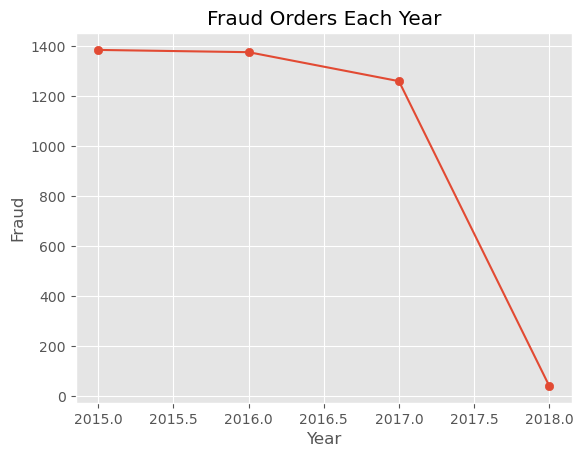

In [41]:
plt.scatter(Fraud_over_year.index,y=Fraud_over_year.values)
plt.plot(Fraud_over_year.index,Fraud_over_year.values)
plt.xlabel("Year")
plt.ylabel('Fraud')
plt.title("Fraud Orders Each Year")
plt.show()

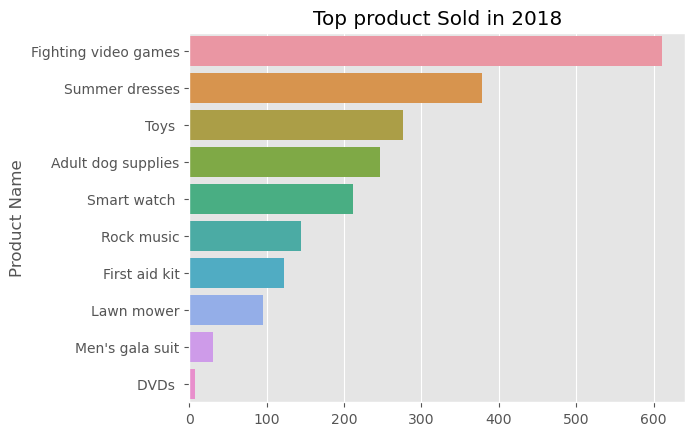

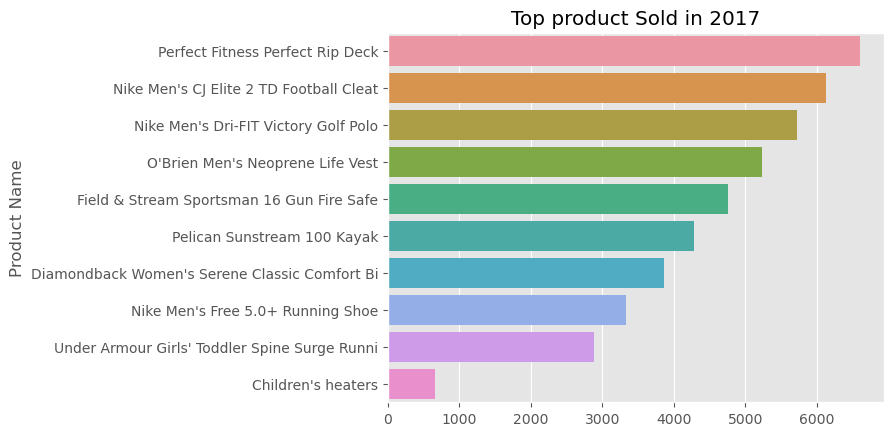

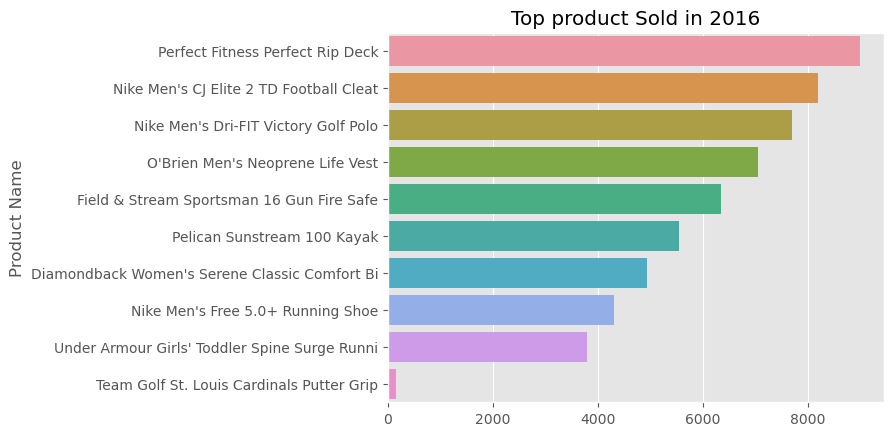

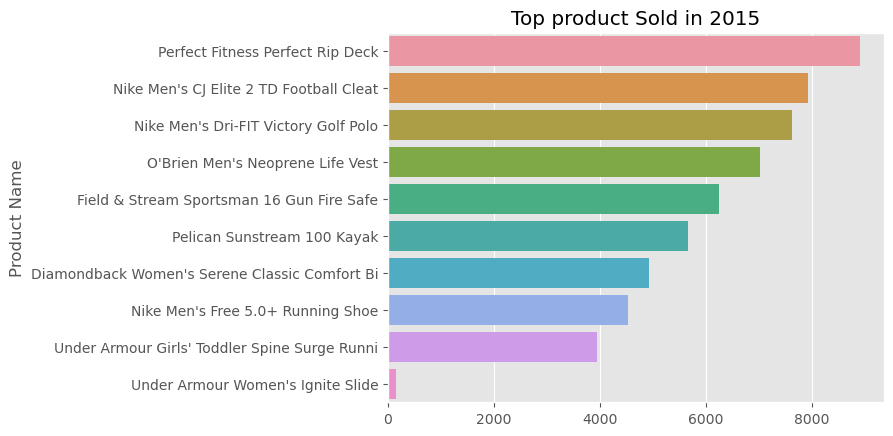

In [42]:
for year in sorted(data['OrderYear'].unique(),reverse =True):
    mini_data = data[data.OrderYear == year]
    mini_data = mini_data.groupby('Product Name').count()['Product Card Id'].sort_values(ascending=False)[:10]
    sns.barplot(y=mini_data.index,x=mini_data.values,orient='h')
    plt.title(f"Top product Sold in {year}" )
    plt.show()

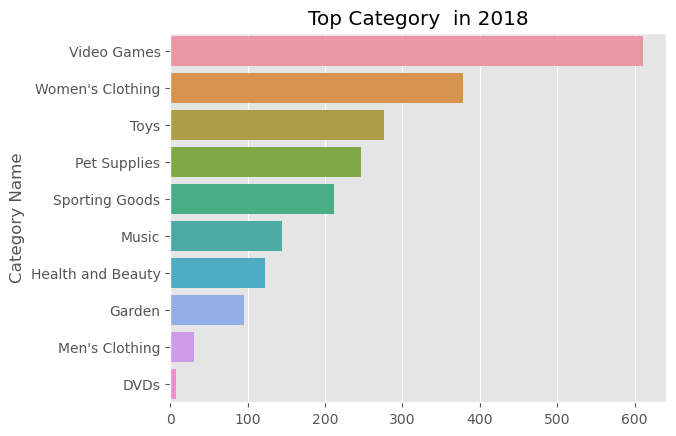

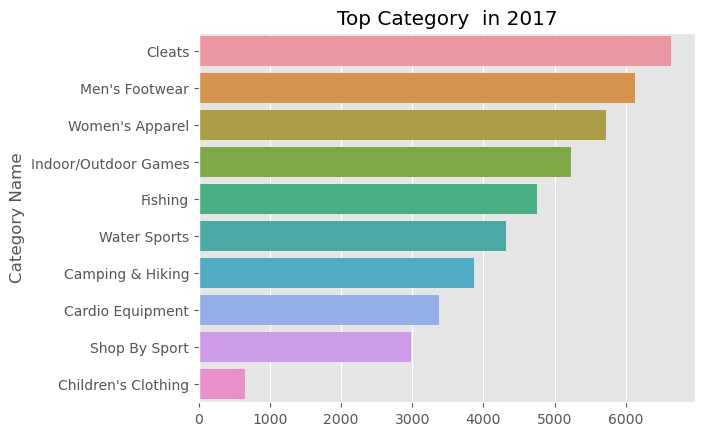

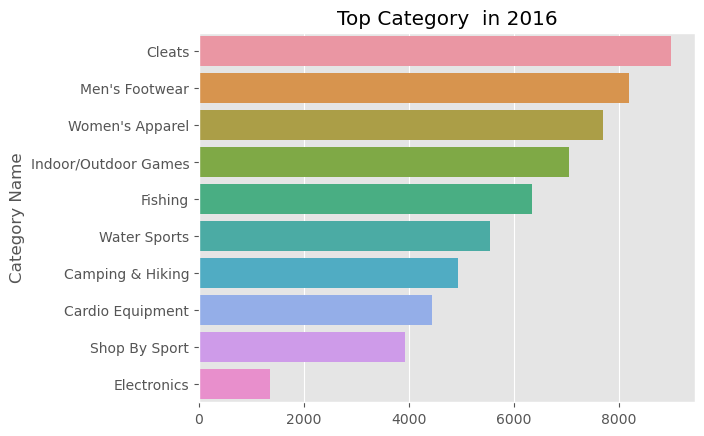

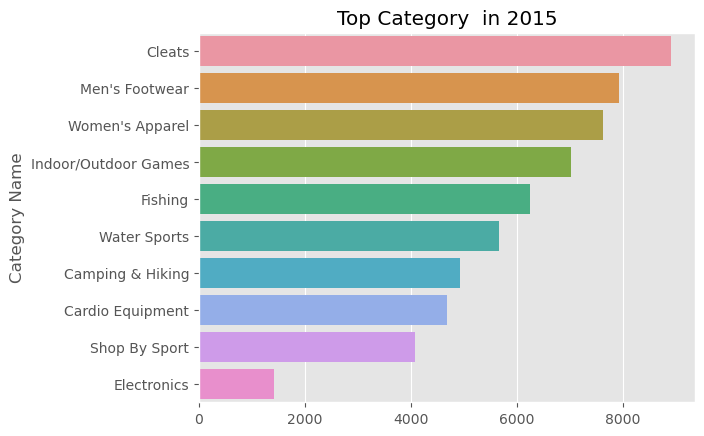

In [43]:
for year in sorted(data['OrderYear'].unique(),reverse =True):
    mini_data = data[data.OrderYear == year]
    mini_data = mini_data.groupby('Category Name').count()['Category Id'].sort_values(ascending=False)[:10]
    sns.barplot(y=mini_data.index,x=mini_data.values,orient='h')
    plt.title(f"Top Category  in {year}" )
    plt.show()

Total Sales is 36.78 M


In [245]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,OrderYear,OrderMonth,isLate,CustomerName,FraudOrder,Order Date,Order Year_month
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2/3/2018 22:56,Standard Class,2018,1,False,Cally Holloway,False,2018-01-31,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,1/18/2018 12:27,Standard Class,2018,1,True,Irene Luna,False,2018-01-13,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,South Asia,Rajastán,CLOSED,1360,Smart watch,327.75,1/17/2018 12:06,Standard Class,2018,1,False,Gillian Maldonado,False,2018-01-13,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,Oceania,Queensland,COMPLETE,1360,Smart watch,327.75,1/16/2018 11:45,Standard Class,2018,1,False,Tana Tate,False,2018-01-13,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.75,1/15/2018 11:24,Standard Class,2018,1,False,Orli Hendricks,False,2018-01-13,2018-01


### Category Name

In [154]:
get_insights('Category Name')

Some Insights about the # Category Name # Column 

Number of Unique Values is 50
Some Random Values ['Fishing' 'Cleats' 'Camping & Hiking' "Men's Footwear" 'Cardio Equipment'] 

top 10 values counts
 Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Name: Category Name, dtype: int64


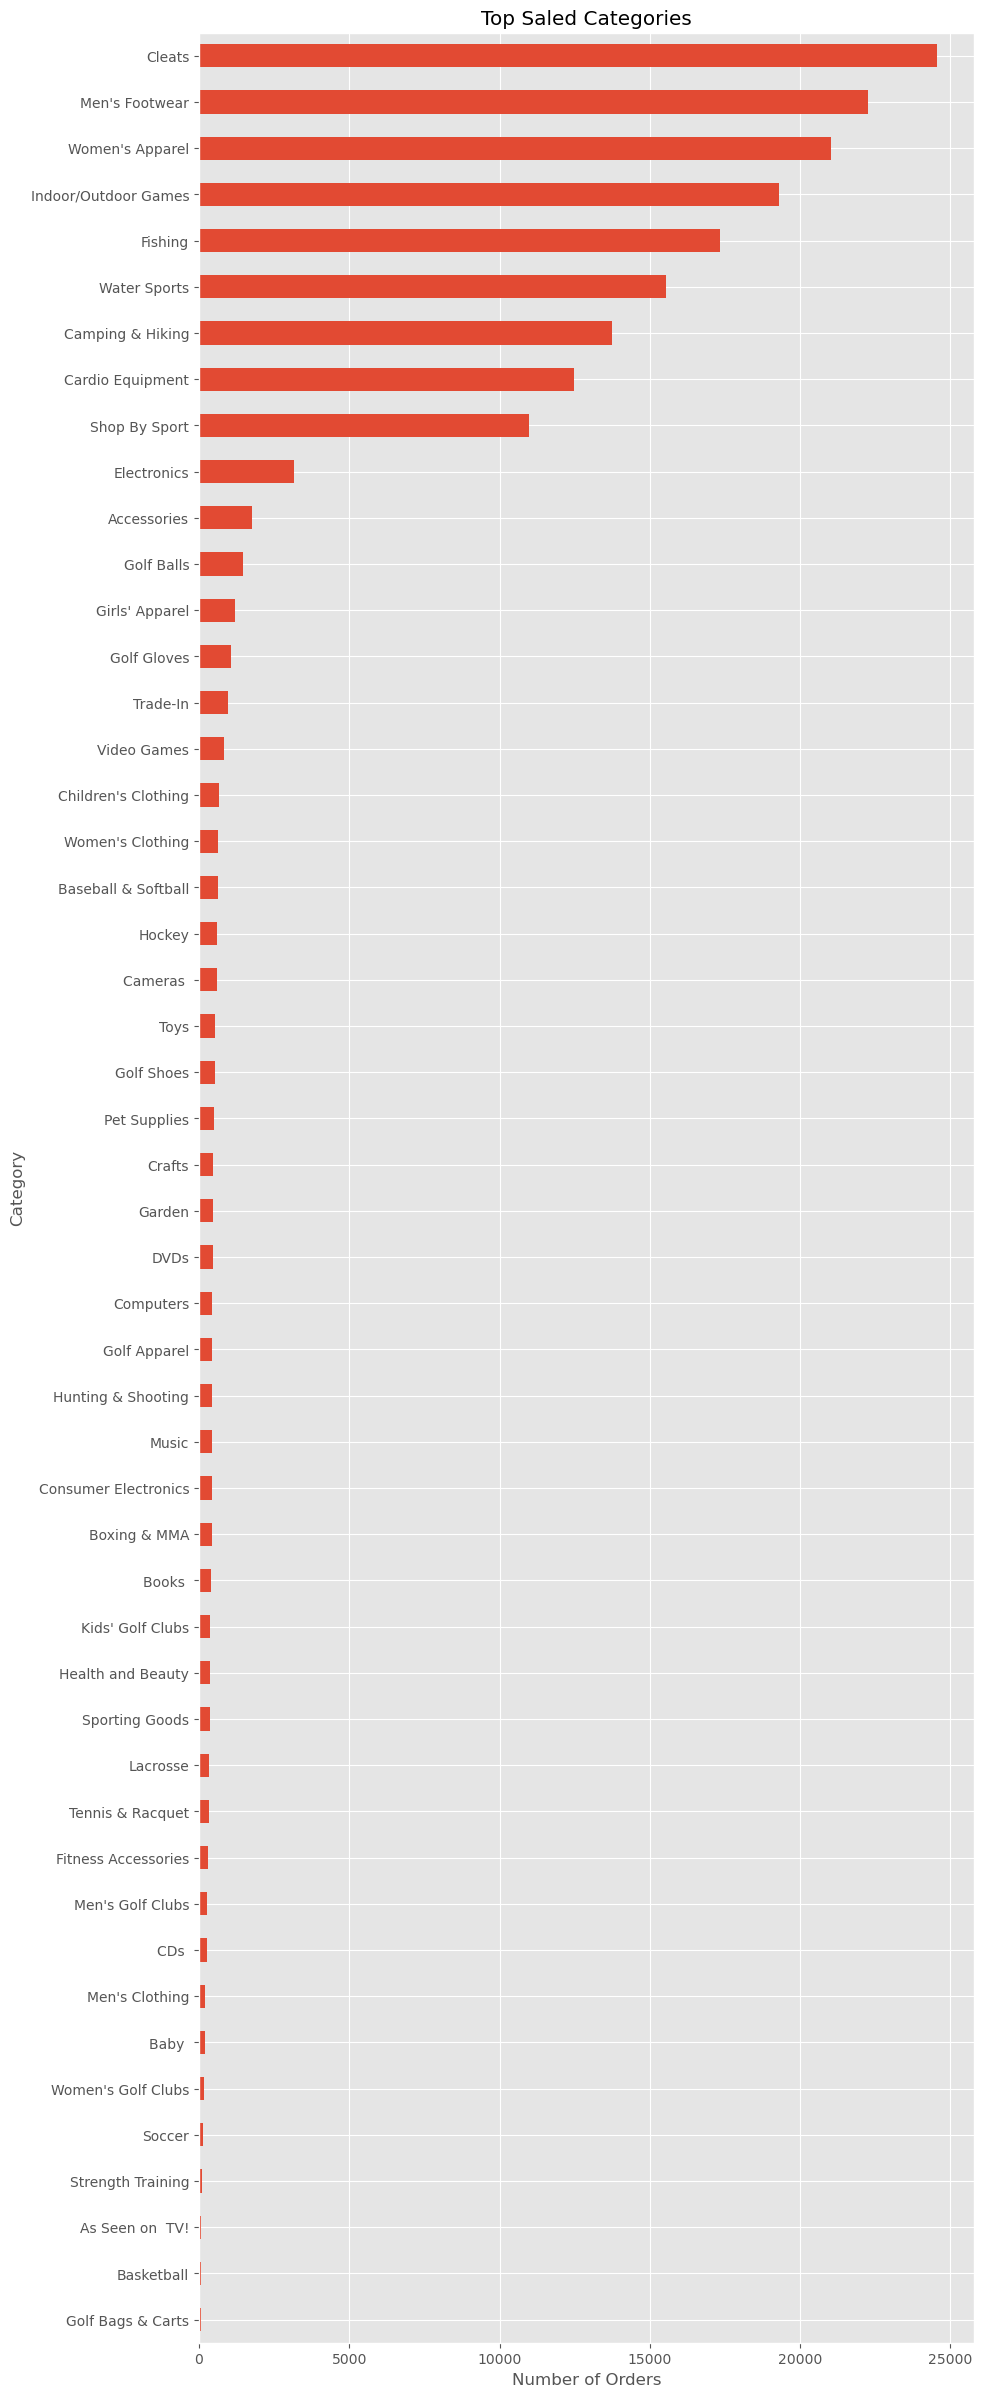

In [155]:
plt.figure(figsize=(10,30))
data.groupby('Category Name').count()['Category Id'].sort_values().plot(kind='barh')
plt.title("Top Saled Categories")
plt.xlabel("Number of Orders")
plt.ylabel("Category")
plt.show()

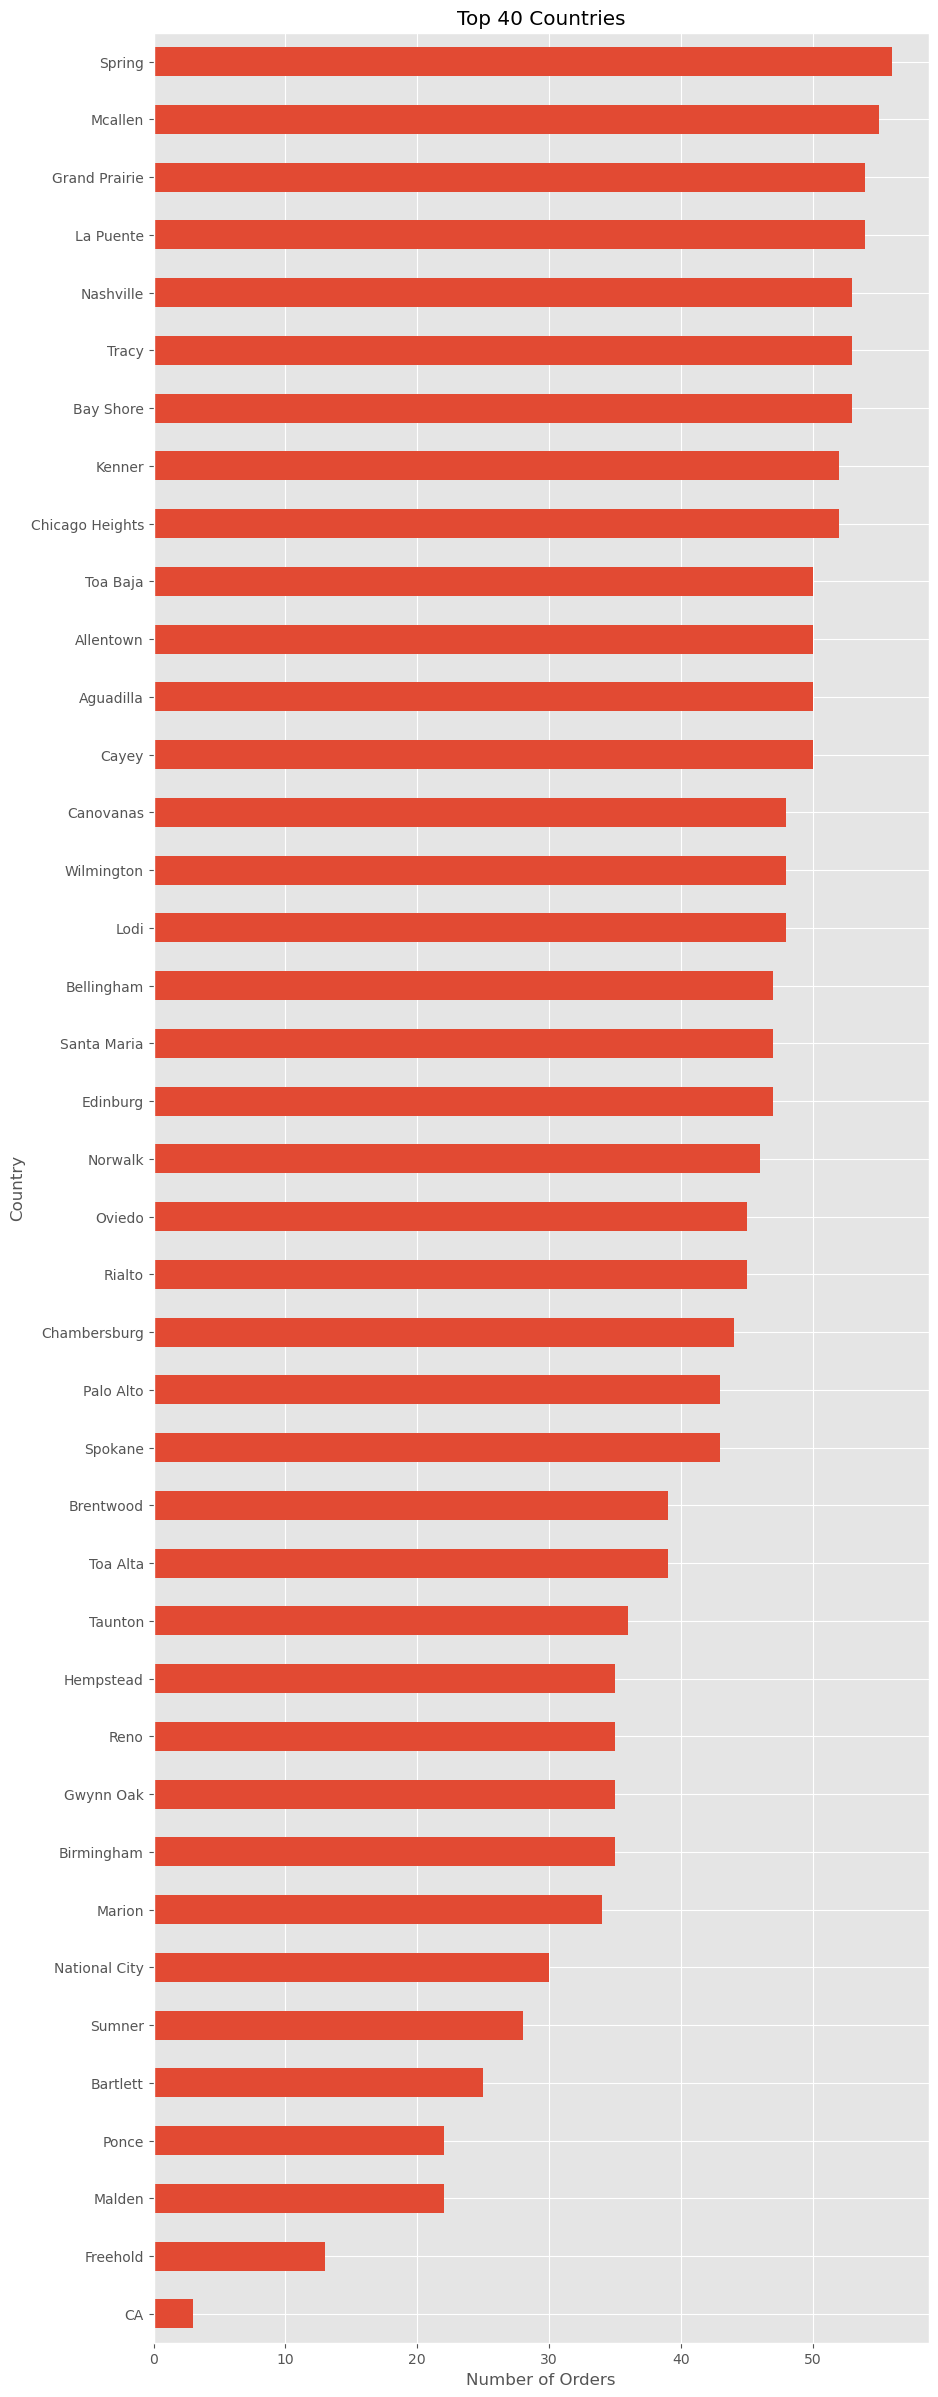

In [156]:
plt.figure(figsize=(10,30))
data.groupby('Customer City').count()['Category Id'].sort_values()[:40].plot(kind='barh')
plt.title("Top 40 Countries")
plt.xlabel("Number of Orders")
plt.ylabel("Country")
plt.show()

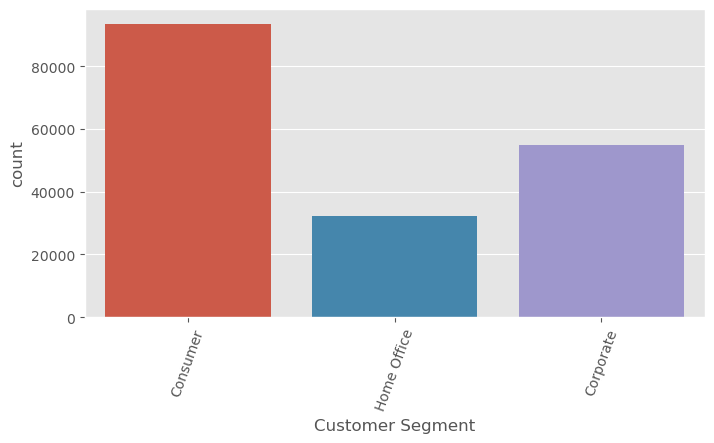

In [157]:
count_plot("Customer Segment")

### Department Name

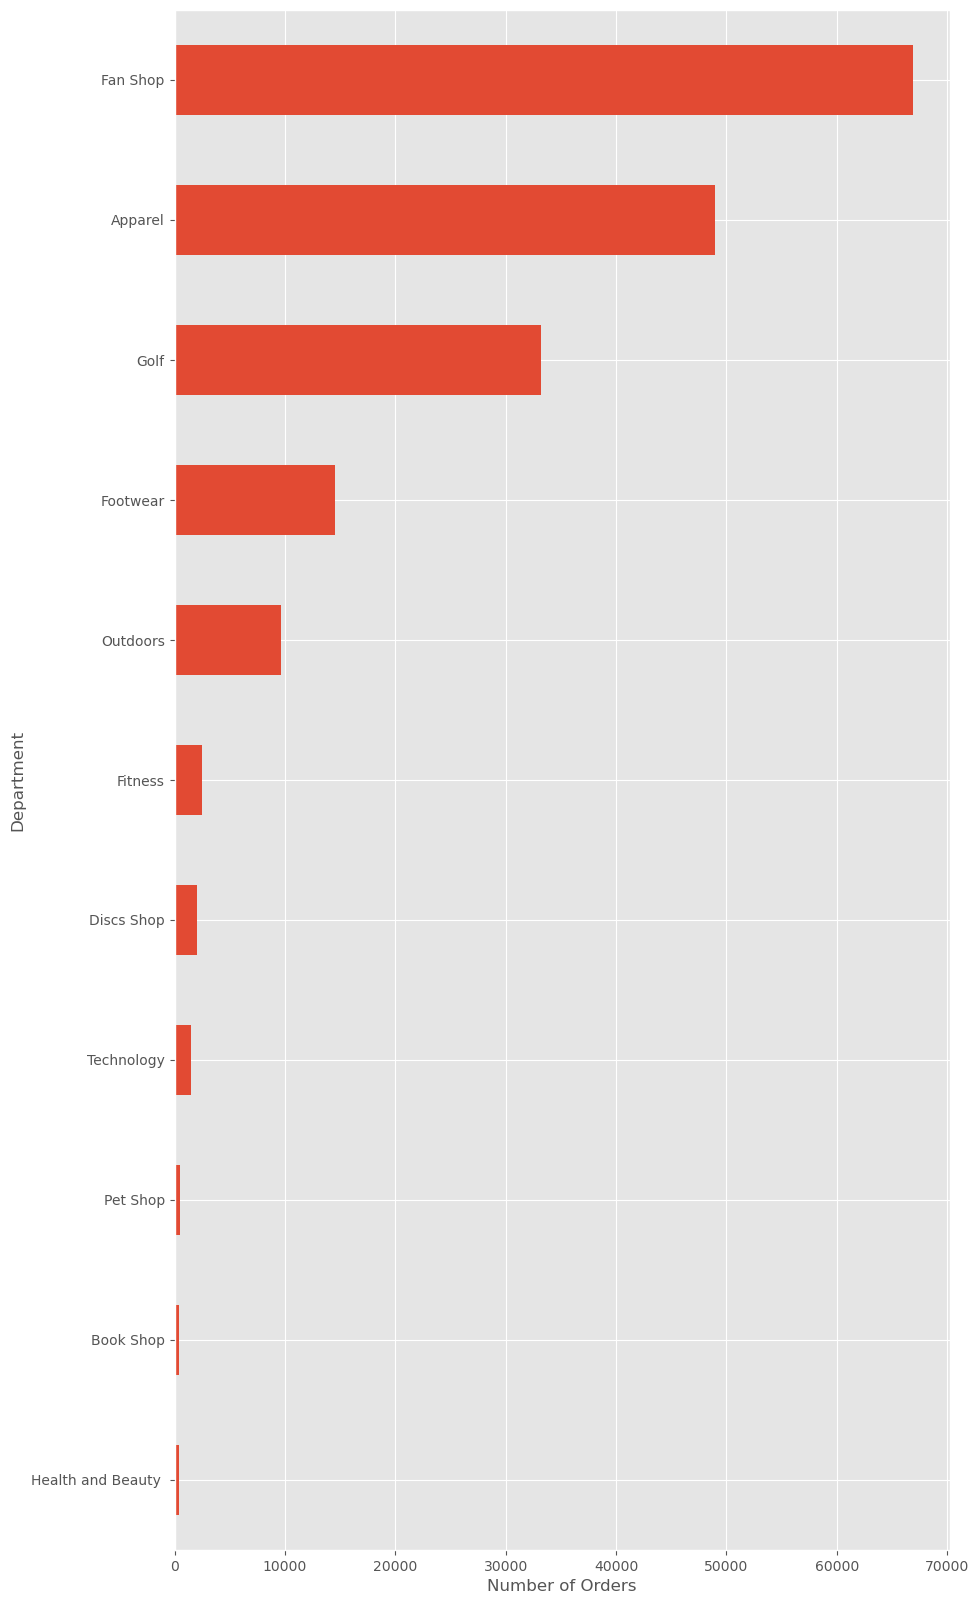

In [158]:
plt.figure(figsize=(10,20))
data.groupby('Department Name').count()['Category Id'].sort_values().plot(kind='barh')
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.show()

### Map

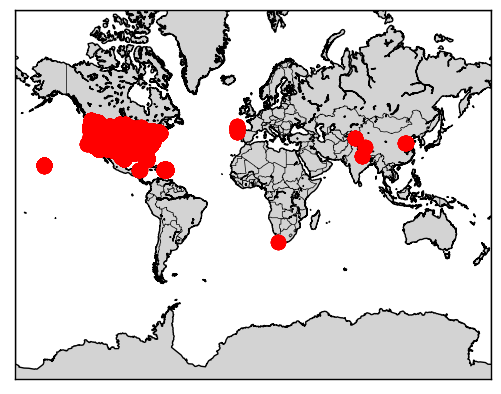

In [160]:
from mpl_toolkits.basemap import Basemap
map = Basemap(projection='merc', lat_0=0, lon_0=0, resolution='l', area_thresh=1000.0,
              llcrnrlon=-180, llcrnrlat=-80, urcrnrlon=180, urcrnrlat=80)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='lightgray', lake_color='white')
map.drawmapboundary(fill_color='white')
x, y = map(data['Longitude'], data['Latitude'])
map.plot(x, y, 'ro', markersize=10)
plt.show()

In [161]:
get_insights('Market')

Some Insights about the # Market # Column 

Number of Unique Values is 5
Some Random Values ['LATAM' 'Pacific Asia' 'LATAM' 'Europe' 'LATAM'] 

top 10 values counts
 LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64


In [162]:
data['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

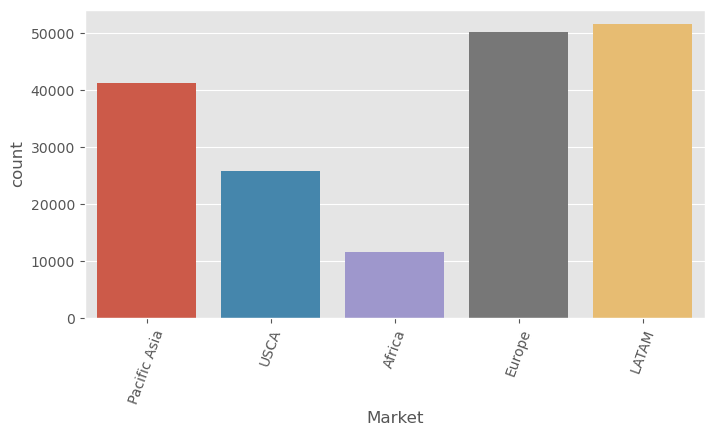

In [163]:
count_plot("Market")

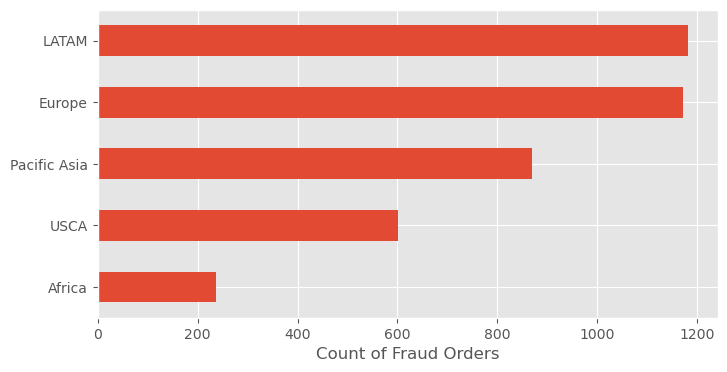

In [173]:
plt.figure(figsize=(8,4))
data[data['FraudOrder'] == True]['Market'].value_counts().sort_values()[:50].plot(kind='barh')
plt.xlabel("Count of Fraud Orders")
plt.show()

### Order Status

In [165]:
get_insights('Order Status')

Some Insights about the # Order Status # Column 

Number of Unique Values is 9
Some Random Values ['PENDING_PAYMENT' 'COMPLETE' 'CLOSED' 'CLOSED' 'PROCESSING'] 

top 10 values counts
 COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64


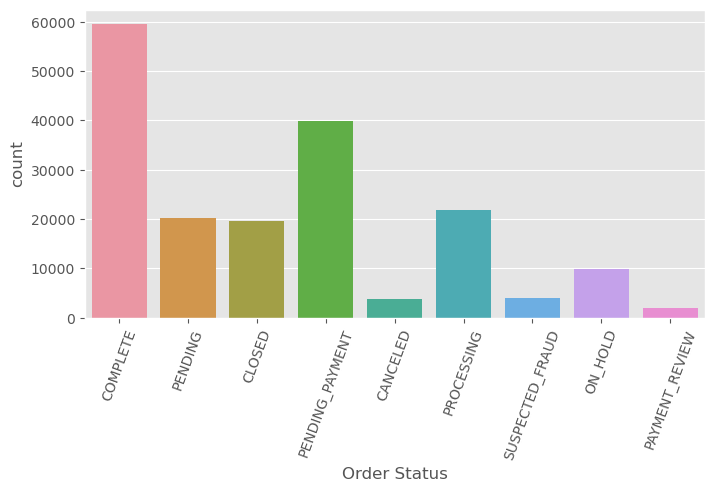

In [166]:
count_plot("Order Status")

In [167]:
data['FraudOrder'] = data['Order Status'].apply(lambda x: True if x == "SUSPECTED_FRAUD" else False)

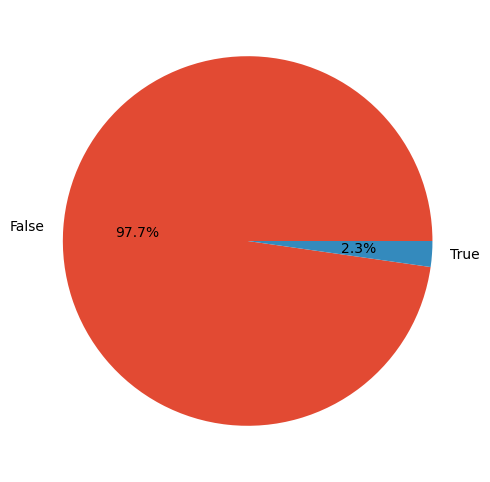

In [168]:
pie_plot("FraudOrder")

### Product Name

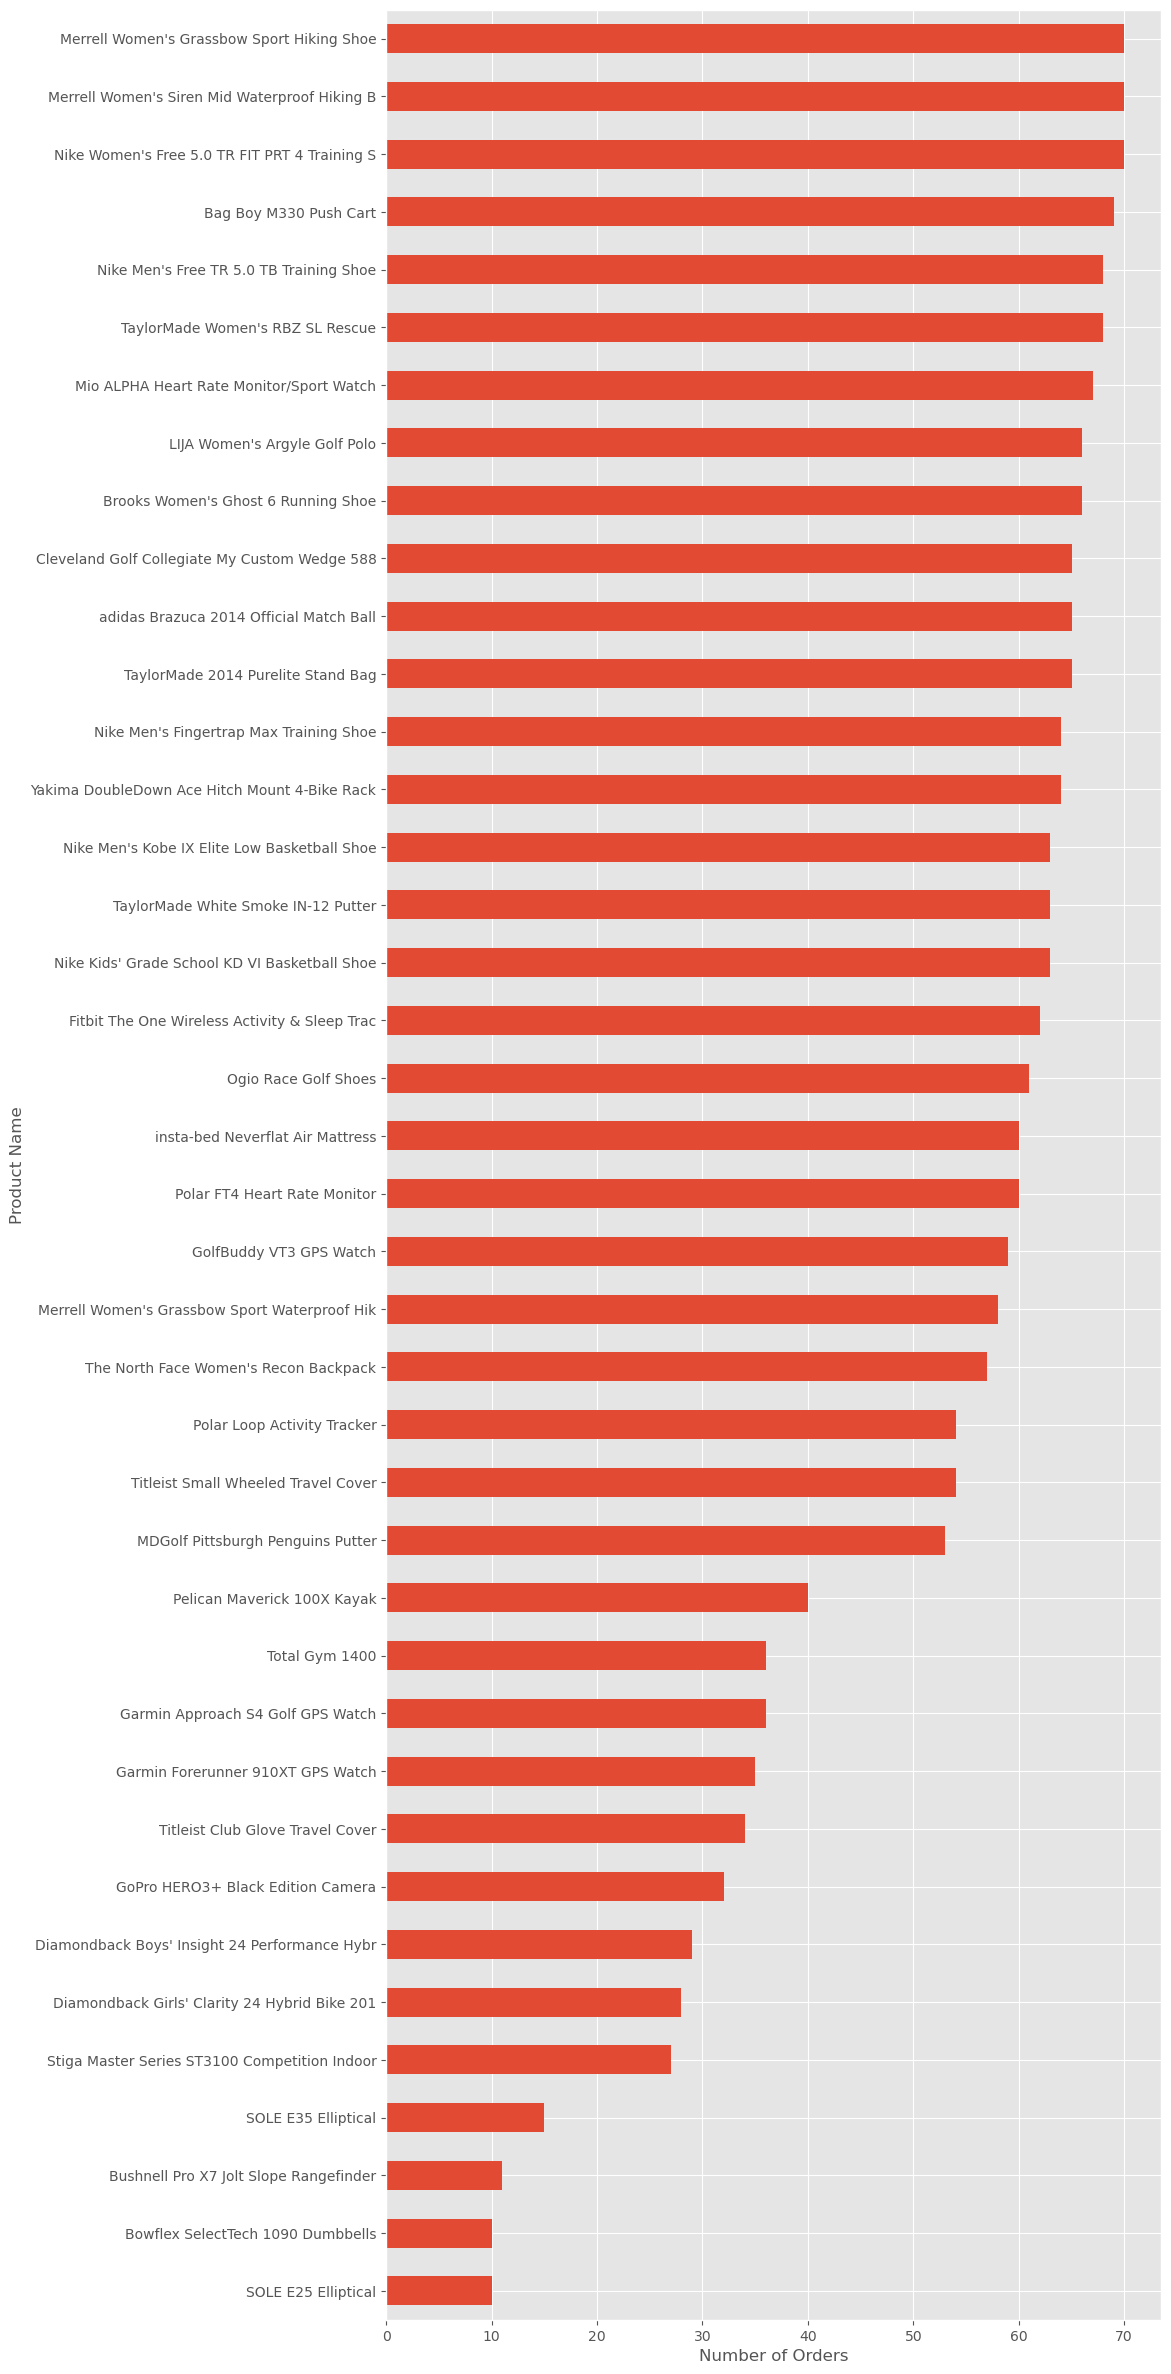

In [169]:
plt.figure(figsize=(10,30))
data.groupby('Product Name').count()['Product Card Id'].sort_values()[:40].plot(kind='barh')
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.show()

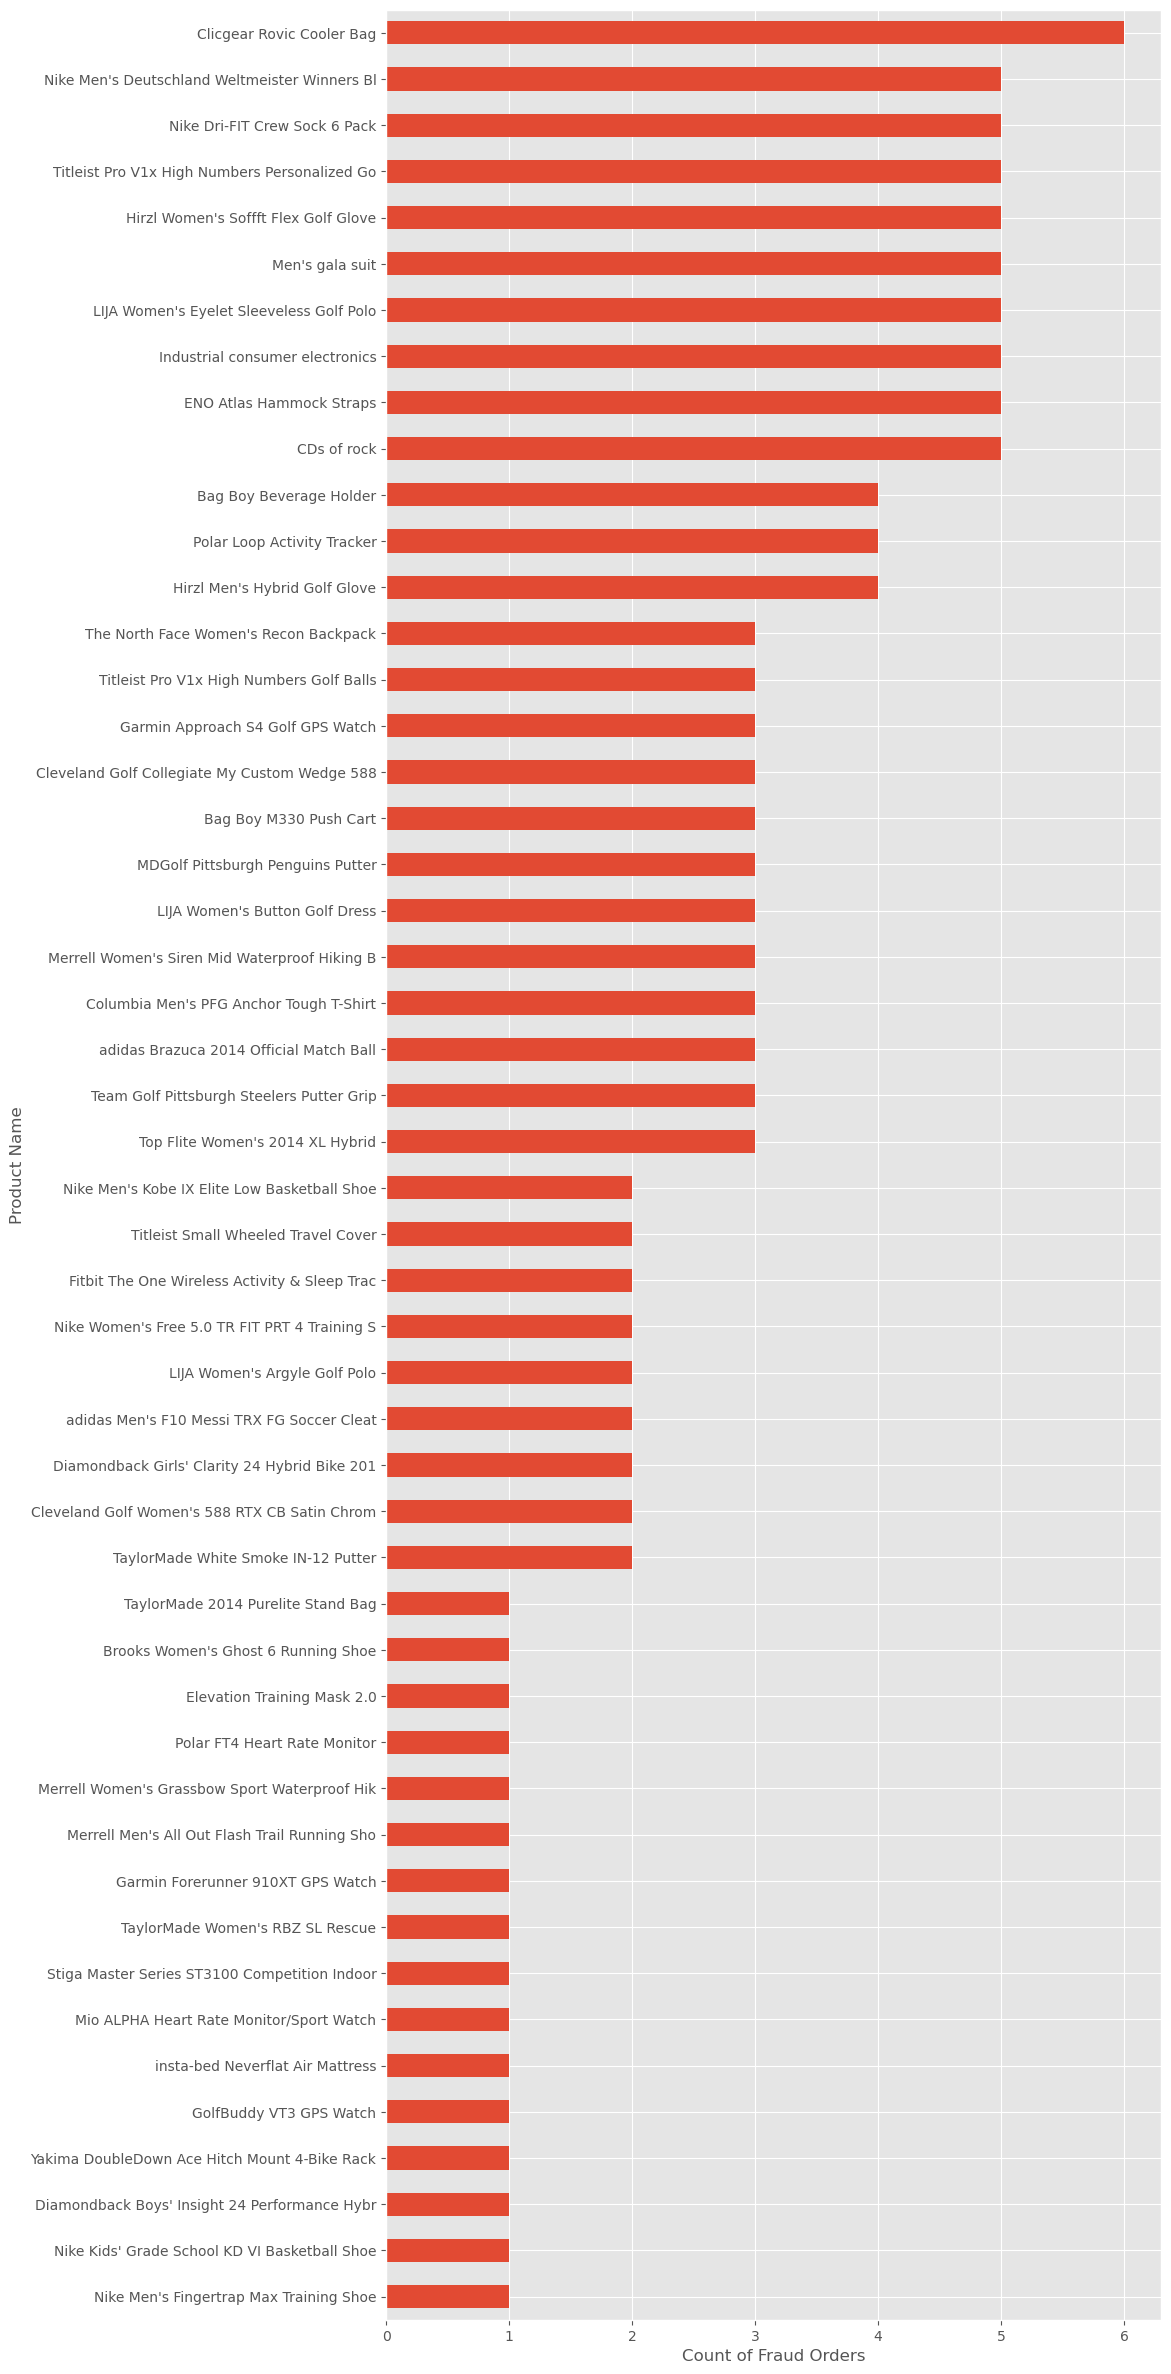

In [170]:
plt.figure(figsize=(10,30))
data[data['FraudOrder'] == True]['Product Name'].value_counts().sort_values()[:50].plot(kind='barh')
plt.xlabel("Count of Fraud Orders")
plt.ylabel('Product Name')
plt.show()

### Shipping Mode

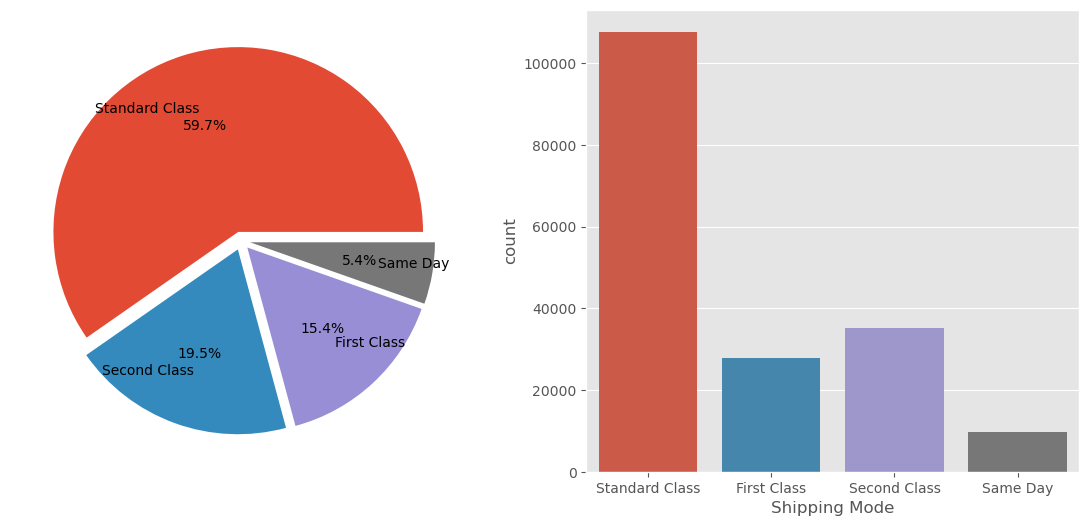

In [171]:
pie_plot_count("Shipping Mode","")

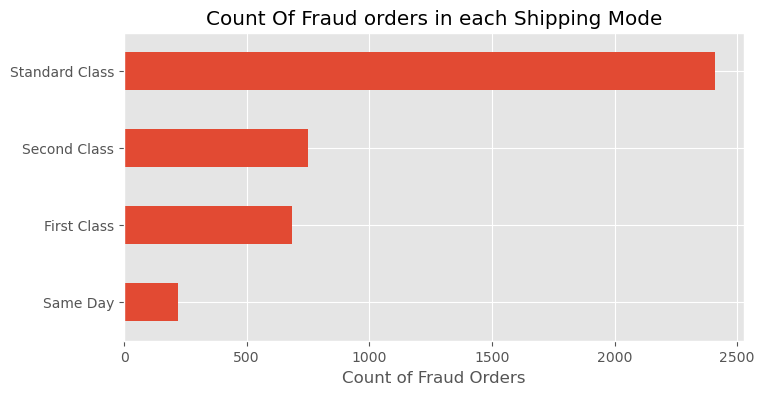

In [172]:
plt.figure(figsize=(8,4))
data[data['FraudOrder'] == True]['Shipping Mode'].value_counts().sort_values()[:50].plot(kind='barh')
plt.xlabel("Count of Fraud Orders")
plt.title("Count Of Fraud orders in each Shipping Mode")
plt.show()

# Conclusion

let's start by important metrics :

 - Total Sales is **36.78** M
 - The number of customers is **20652** customer
 - The number of Categories is **51** Category
 - the number of Orders is **65752** Order
 
let's start by talking about the delivery time, I think it's the most critical service must every business owner take care of it because most of customers want to get their orders on time after checking the data we found that **55%** of orders are delivered late.
Shipping Mode for late delivery orders is ordered as following: Standard Class , Second Class,First Class and Same Day.




## Preprocessing

In [246]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Region', 'Order State',
       'Order Status', 'Product Card Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode', 'OrderYear',
       'OrderMonth', 'isLate', 'CustomerName', 'FraudOrder', 'Order Date',
       'Order Year_month'],
      dtype='object')

In [253]:
columns = ['Type','Delivery Status','Late_delivery_risk','Category Name','Customer City','Customer Segment','Department Name',
          'Market','Order Country','Order Item Quantity','Order Region',
          'Product Price','Shipping Mode','FraudOrder']
fraud_data = data[columns]

In [254]:
fraud_data.to_csv('Data/fraud_data.csv')